In [59]:
from keras.models import Model, load_model
from lime import lime_image
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.segmentation import mark_boundaries
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, img_to_array, \
    load_img

explainer = lime_image.LimeImageExplainer()

In [11]:
model = tf.keras.models.load_model(r'C:/Users/kavel/Documents/data science master/AML/xnception_65/inception.h5')

In [36]:
IMG_HEIGHT=IMG_WIDTH=299
sample = pd.read_csv("C:/Users/kavel/Documents/data science master/AML/food-recognition-challenge-2021/sample.csv",dtype={'img_name':str, 'label':str} )
test_datagen = ImageDataGenerator(
    rescale=1./255
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=sample,
    directory= "C:/Users/kavel/Documents/data science master/AML/food-recognition-challenge-2021/test_set/test_set/" , 
    x_col='img_name',
    y_col='label',
    class_mode = 'categorical',
    shuffle=False,
    target_size=(IMG_HEIGHT,IMG_WIDTH) 
)

batch = test_generator.next()


Found 7653 validated image filenames belonging to 1 classes.


In [76]:
def draw_explanation(image):
    explanation = explainer.explain_instance(image.astype('double'), model.predict,  
                                         top_labels=1, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.imshow(image)
    ax2.imshow(mark_boundaries(temp, mask))


In [88]:
class_names = np.load('class_names.npy', allow_pickle=True).item()

class_names[9]

'compote'

11


  0%|          | 0/1000 [00:00<?, ?it/s]

12


  0%|          | 0/1000 [00:00<?, ?it/s]

13


  0%|          | 0/1000 [00:00<?, ?it/s]

14


  0%|          | 0/1000 [00:00<?, ?it/s]

15


  0%|          | 0/1000 [00:00<?, ?it/s]

16


  0%|          | 0/1000 [00:00<?, ?it/s]

17


  0%|          | 0/1000 [00:00<?, ?it/s]

18


  0%|          | 0/1000 [00:00<?, ?it/s]

19


  0%|          | 0/1000 [00:00<?, ?it/s]

20


  0%|          | 0/1000 [00:00<?, ?it/s]

21


  0%|          | 0/1000 [00:00<?, ?it/s]

22


  0%|          | 0/1000 [00:00<?, ?it/s]

23


  0%|          | 0/1000 [00:00<?, ?it/s]

24


  0%|          | 0/1000 [00:00<?, ?it/s]

25


  0%|          | 0/1000 [00:00<?, ?it/s]

26


  0%|          | 0/1000 [00:00<?, ?it/s]

27


  0%|          | 0/1000 [00:00<?, ?it/s]

28


  0%|          | 0/1000 [00:00<?, ?it/s]

29


  0%|          | 0/1000 [00:00<?, ?it/s]

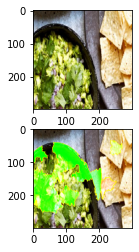

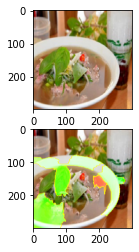

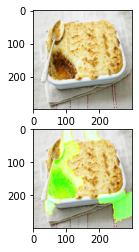

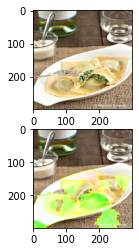

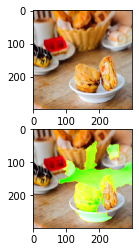

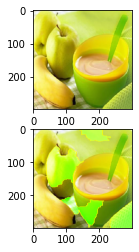

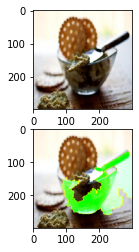

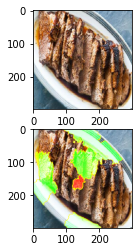

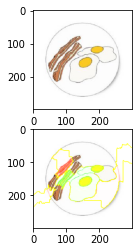

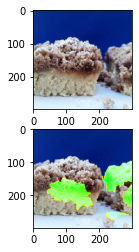

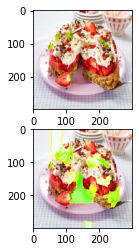

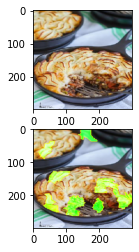

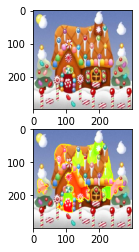

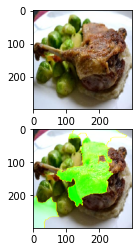

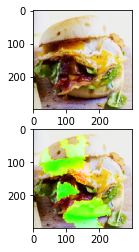

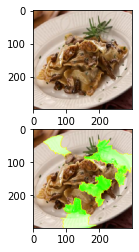

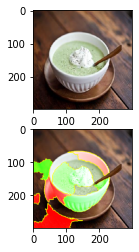

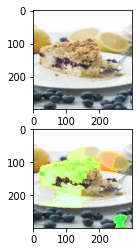

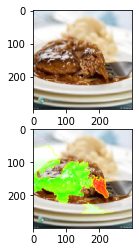

In [92]:
for i in range(11,30):
    print(i)
    draw_explanation(batch[0][i])